
목표 : A구와 B구의 승용차 이용류 비교 (단측 vs 양측 검정 수행)

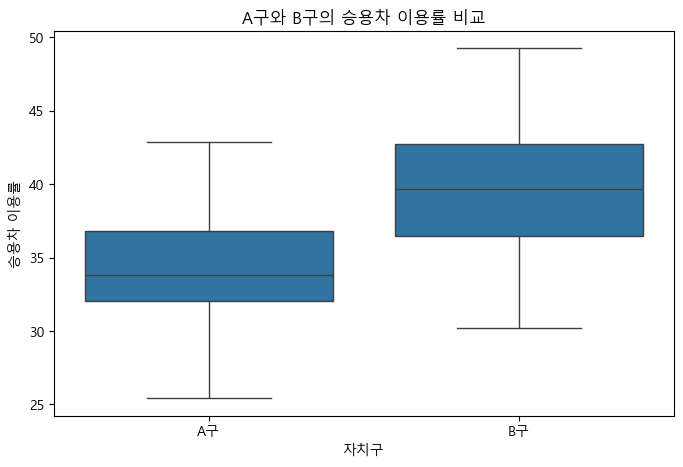

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'

# 랜덤 시드 설정
np.random.seed(42)

# 가상의 승용차 이용률 데이터 생성 (평균 35%, 40%)
a_district = np.random.normal(loc=35, scale=5, size=30)  # A구
b_district = np.random.normal(loc=40, scale=5, size=30)  # B구

# 데이터프레임 생성
df = pd.DataFrame({'승용차 이용률': np.concatenate([a_district, b_district]),
                   '자치구': ['A구'] * 30 + ['B구'] * 30})

# 데이터 시각화 (박스플롯)
plt.figure(figsize=(8, 5))
sns.boxplot(x='자치구', y='승용차 이용률', data=df)
plt.title("A구와 B구의 승용차 이용률 비교")
plt.show()


In [3]:
# 양측 검정 (두 집단 평균 비교)
t_stat, p_value = stats.ttest_ind(a_district, b_district, equal_var=True)

print(f"양측 검정 결과:")
print(f"t-통계량: {t_stat:.4f}, p-value: {p_value:.4f}")

# p-value 해석
if p_value <= 0.05:
    print("귀무가설 기각 → A구와 B구의 승용차 이용률 차이가 유의미함")
else:
    print("귀무가설 유지 → A구와 B구의 승용차 이용률 차이가 우연일 가능성이 큼")


양측 검정 결과:
t-통계량: -4.5129, p-value: 0.0000
귀무가설 기각 → A구와 B구의 승용차 이용률 차이가 유의미함


In [4]:
# 단측 검정 (A구가 B구보다 작은지 검정)
t_stat, p_value_one_sided = stats.ttest_ind(a_district, b_district, alternative='less', equal_var=True)

print(f"단측 검정 결과 (A구 < B구):")
print(f"t-통계량: {t_stat:.4f}, p-value: {p_value_one_sided:.4f}")

# p-value 해석
if p_value_one_sided <= 0.05:
    print("귀무가설 기각 → A구의 승용차 이용률이 B구보다 유의미하게 낮음")
else:
    print("귀무가설 유지 → A구와 B구의 승용차 이용률 차이가 우연일 가능성이 큼")


단측 검정 결과 (A구 < B구):
t-통계량: -4.5129, p-value: 0.0000
귀무가설 기각 → A구의 승용차 이용률이 B구보다 유의미하게 낮음
